<a href="https://colab.research.google.com/github/IvanKatorgin/Satistics-in-Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2_Python_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

Сначала поизучаем данные

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
(pokemon.isna().mean() * 100).round(2)

pid           0.00
Name          0.12
Class 1       0.00
Class 2      48.25
HP            0.00
Attack        0.00
Defense       0.00
Sp. Atk       0.00
Sp. Def       0.00
Speed         0.00
Legendary     0.00
dtype: float64

In [ ]:
pokemon['Name'].value_counts()

Name
Bulbasaur    1
Gallade      1
Probopass    1
Dusknoir     1
Froslass     1
            ..
Ho-oh        1
Celebi       1
Treecko      1
Grovyle      1
Volcanion    1
Name: count, Length: 799, dtype: int64

In [ ]:
pokemon['Class 1'].value_counts()

Class 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [ ]:
pokemon['Class 2'].value_counts()

Class 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

In [ ]:
pokemon['HP'].value_counts()

HP
60     67
50     63
70     57
65     46
80     43
       ..
111     1
160     1
81      1
140     1
97      1
Name: count, Length: 94, dtype: int64

In [ ]:
pokemon['Attack'].value_counts()

Attack
100    40
65     39
50     37
80     37
85     33
       ..
46      1
190     1
106     1
132     1
33      1
Name: count, Length: 111, dtype: int64

In [ ]:
pokemon['Defense'].value_counts()

Defense
70     54
50     49
60     46
80     39
40     36
       ..
168     1
10      1
51      1
61      1
121     1
Name: count, Length: 103, dtype: int64

In [ ]:
pokemon['Sp. Atk'].value_counts()

Sp. Atk
60     51
40     49
65     44
50     39
55     35
       ..
78      1
31      1
194     1
29      1
175     1
Name: count, Length: 105, dtype: int64

In [ ]:
pokemon['Sp. Def'].value_counts()

Sp. Def
80     52
50     50
55     47
65     44
60     43
       ..
23      1
230     1
31      1
64      1
113     1
Name: count, Length: 92, dtype: int64

In [ ]:
pokemon['Speed'].value_counts()

Speed
50     46
60     44
70     37
65     36
30     35
       ..
39      1
24      1
82      1
113     1
123     1
Name: count, Length: 108, dtype: int64

In [ ]:
pokemon['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [ ]:
print(pokemon['Name'].unique())
print(pokemon['Class 1'].unique())
print(pokemon['Class 2'].unique())
print(pokemon['HP'].unique())
print(pokemon['Attack'].unique())
print(pokemon['Defense'].unique())
print(pokemon['Sp. Atk'].unique())
print(pokemon['Sp. Def'].unique())
print(pokemon['Speed'].unique())
print(pokemon['Legendary'].unique())

['Bulbasaur' 'Ivysaur' 'Venusaur' 'Mega Venusaur' 'Charmander'
 'Charmeleon' 'Charizard' 'Mega Charizard X' 'Mega Charizard Y' 'Squirtle'
 'Wartortle' 'Blastoise' 'Mega Blastoise' 'Caterpie' 'Metapod'
 'Butterfree' 'Weedle' 'Kakuna' 'Beedrill' 'Mega Beedrill' 'Pidgey'
 'Pidgeotto' 'Pidgeot' 'Mega Pidgeot' 'Rattata' 'Raticate' 'Spearow'
 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew' 'Sandslash'
 'Nidoranâ™€' 'Nidorina' 'Nidoqueen' 'Nidoranâ™‚' 'Nidorino' 'Nidoking'
 'Clefairy' 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff'
 'Zubat' 'Golbat' 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect'
 'Venonat' 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck'
 'Golduck' 'Mankey' nan 'Growlithe' 'Arcanine' 'Poliwag' 'Poliwhirl'
 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'Mega Alakazam' 'Machop'
 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel' 'Tentacool'
 'Tentacruel' 'Geodude' 'Graveler' 'Golem' 'Ponyta' 'Rapidash' 'Slowpoke'
 'Slowbro' 'Mega Slowbro' 'Magnem

In [ ]:
print(pokemon['HP'].mean())
print(pokemon['HP'].median())
print(pokemon['HP'].mode()[0])
print(pokemon['HP'].std())
print(pokemon['HP'].var())

69.25875
65.0
60
25.53466903233207
652.0193225907384


In [ ]:
print(pokemon['Attack'].mean())
print(pokemon['Attack'].median())
print(pokemon['Attack'].mode()[0])
print(pokemon['Attack'].std())
print(pokemon['Attack'].var())

79.00125
75.0
100
32.45736586949845
1053.4805991864832


In [ ]:
print(pokemon['Defense'].mean())
print(pokemon['Defense'].median())
print(pokemon['Defense'].mode()[0])
print(pokemon['Defense'].std())
print(pokemon['Defense'].var())

73.8425
70.0
70
31.183500559332934
972.4107071339174


In [ ]:
print(pokemon['Sp. Atk'].mean())
print(pokemon['Sp. Atk'].median())
print(pokemon['Sp. Atk'].mode()[0])
print(pokemon['Sp. Atk'].std())
print(pokemon['Sp. Atk'].var())

72.82
65.0
60
32.7222941688016
1070.748535669587


In [ ]:
print(pokemon['Sp. Def'].mean())
print(pokemon['Sp. Def'].median())
print(pokemon['Sp. Def'].mode()[0])
print(pokemon['Sp. Def'].std())
print(pokemon['Sp. Def'].var())

71.9025
70.0
80
27.82891579711746
774.4485544430538


In [ ]:
print(pokemon['Speed'].mean())
print(pokemon['Speed'].median())
print(pokemon['Speed'].mode()[0])
print(pokemon['Speed'].std())
print(pokemon['Speed'].var())

68.2775
65.0
50
29.060473717161464
844.5111326658323


In [ ]:
pokemon[['Class 1', 'Class 2', 'Legendary']].mode()

,Class 1,Class 2,Legendary
0,Water,Flying,False


In [ ]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


Оставим покемонов, у которых только один класс

In [ ]:
df = pokemon.dropna(subset=['Class 2'])
pokemon_ = pd.concat([pokemon,df]).drop_duplicates(keep=False)
pokemon_

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False


Поскольку нас интересуют только классы Grass и Rock, то оставим только эти два класса

In [ ]:
pokemon_1 = pokemon_[pokemon_['Class 1'].isin(['Grass', 'Rock'])]

pokemon_1

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
122,123,Tangela,Grass,NaN,65,55,115,100,40,60,False
166,167,Chikorita,Grass,NaN,45,49,65,49,65,45,False
167,168,Bayleef,Grass,NaN,60,62,80,63,80,60,False
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,False
197,198,Bellossom,Grass,NaN,75,80,95,90,100,50,False
200,201,Sudowoodo,Rock,NaN,70,100,115,30,65,30,False
206,207,Sunkern,Grass,NaN,30,30,30,30,30,30,False
207,208,Sunflora,Grass,NaN,75,75,55,105,85,30,False
272,273,Treecko,Grass,NaN,40,45,35,65,55,70,False
273,274,Grovyle,Grass,NaN,50,65,45,85,65,95,False


In [ ]:
pokemon_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 122 to 741
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        42 non-null     int64 
 1   Name       42 non-null     object
 2   Class 1    42 non-null     object
 3   Class 2    0 non-null      object
 4   HP         42 non-null     int64 
 5   Attack     42 non-null     int64 
 6   Defense    42 non-null     int64 
 7   Sp. Atk    42 non-null     int64 
 8   Sp. Def    42 non-null     int64 
 9   Speed      42 non-null     int64 
 10  Legendary  42 non-null     bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 4.7+ KB


In [ ]:
pokemon_1['Class 1'].value_counts()

Class 1
Grass    33
Rock      9
Name: count, dtype: int64

Сравняем оба класса. Рандомно удалим из класса Grass лишние покемоны, чтобы обе выборки были одинаковые

In [ ]:
Grass = pokemon_1[pokemon_1['Class 1'] == 'Grass'].sample(n=9, random_state=22)
Rock = pokemon_1[pokemon_1['Class 1'] == 'Rock']


ab_test = pd.concat([Grass, Rock], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [ ]:
Grass

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
521,522,Leafeon,Grass,NaN,65,110,130,60,65,95,False
719,720,Quilladin,Grass,NaN,61,78,95,56,58,57,False
740,741,Skiddo,Grass,NaN,66,65,48,62,57,52,False
554,555,Snivy,Grass,NaN,45,45,55,45,55,63,False
296,297,Seedot,Grass,NaN,40,40,50,30,30,30,False
467,468,Cherubi,Grass,NaN,45,35,45,62,53,35,False
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,False
505,506,Carnivine,Grass,NaN,74,100,72,90,72,46,False
617,618,Maractus,Grass,NaN,75,86,67,106,67,60,False


In [ ]:
ab_test

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,522,Leafeon,Grass,NaN,65,110,130,60,65,95,False
1,720,Quilladin,Grass,NaN,61,78,95,56,58,57,False
2,741,Skiddo,Grass,NaN,66,65,48,62,57,52,False
3,555,Snivy,Grass,NaN,45,45,55,45,55,63,False
4,297,Seedot,Grass,NaN,40,40,50,30,30,30,False
5,468,Cherubi,Grass,NaN,45,35,45,62,53,35,False
6,169,Meganium,Grass,NaN,80,82,100,83,100,80,False
7,506,Carnivine,Grass,NaN,74,100,72,90,72,46,False
8,618,Maractus,Grass,NaN,75,86,67,106,67,60,False
9,201,Sudowoodo,Rock,NaN,70,100,115,30,65,30,False


In [ ]:
ab_test['Class 1'].value_counts()

Class 1
Grass    9
Rock     9
Name: count, dtype: int64

В итоговой таблице осталось 18 строк, с которыми будем проводить тест

In [ ]:
pd.crosstab(ab_test['Class 1'], ab_test['Attack'])

Attack,35,40,45,65,75,78,80,82,86,100,105,110,125,135,165
Class 1,,,,,,,,,,,,,,,
Grass,1,1,1,1,0,1,0,1,1,1,0,1,0,0,0
Rock,0,0,1,0,1,0,1,0,0,2,1,0,1,1,1


In [ ]:
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [ ]:
conversion_rates = ab_test.groupby('Class 1')['Attack']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Сила', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

,Сила,сред. кв. отклонение,ошибка среднего
Class 1,,,
Grass,71.222,25.222,8.407
Rock,103.333,33.417,11.139


Судя по приведенной выше статистике, похоже, что Профессор Оук ошибался, подозревая, что покемоны в классе Grass имеют более сильную обычную атаку, чем покемоны в классе Rock. Скорее наоборот, покемоны в классе Rock имеют более сильную атаку, чем покемоны в классе Grass (103,3 против 71,2)

Визуализация данных облегчит понимание этих результатов:

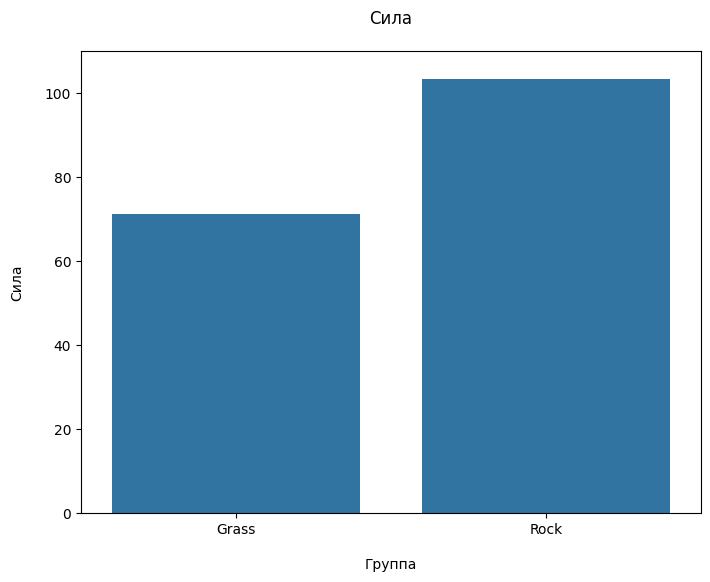

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['Class 1'], y=ab_test['Attack'], ci=False)

plt.ylim(0, 110)
plt.title('Сила', pad=20)
plt.xlabel('Группа', labelpad=15)
plt.ylabel('Сила', labelpad=15);

Проверка гипотезы. Используем Т-тест Стьюдента

In [ ]:
Grass = ab_test[ab_test['Class 1'] == 'Grass']['Attack']
Rock = ab_test[ab_test['Class 1'] == 'Rock']['Attack']

In [ ]:
stat, p = st.ttest_ind(Grass, Rock)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в группах Grass и Rock нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = -2.16935, p = 0.04546
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы: поскольку наше значение  p=0.04546  не превышает наше значение  α=0.05 , мы можем отвергнуть нулевую гипотезу  H0 , а это означает, что Профессор Оук ошибался, подозревая, что покемоны в классе Grass имеют более сильную обычную атаку, чем покемоны в классе Rock. Построенная выше визуализация показывает, что покемоны в классе Rock имеют более сильную атаку, чем покемоны в классе Grass

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

Поскольку нас интересуют только классы Water и Normal, то оставим только эти два класса

In [ ]:
pokemon_2 = pokemon_[pokemon_['Class 1'].isin(['Water', 'Normal'])]

pokemon_2

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False
...,...,...,...,...,...,...,...,...,...,...,...
725,726,Frogadier,Water,NaN,54,63,52,83,56,97,False
727,728,Bunnelby,Normal,NaN,38,36,38,32,36,57,False
744,745,Furfrou,Normal,NaN,75,80,60,65,90,102,False
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False


In [ ]:
pokemon_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 9 to 763
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        120 non-null    int64 
 1   Name       120 non-null    object
 2   Class 1    120 non-null    object
 3   Class 2    0 non-null      object
 4   HP         120 non-null    int64 
 5   Attack     120 non-null    int64 
 6   Defense    120 non-null    int64 
 7   Sp. Atk    120 non-null    int64 
 8   Sp. Def    120 non-null    int64 
 9   Speed      120 non-null    int64 
 10  Legendary  120 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 14.5+ KB


In [ ]:
pokemon_2['Class 1'].value_counts()

Class 1
Normal    61
Water     59
Name: count, dtype: int64

Сравняем оба класса. Рандомно удалим из класса Normal лишние покемоны, чтобы обе выборки были одинаковые

In [ ]:
Normal = pokemon_2[pokemon_2['Class 1'] == 'Normal'].sample(n=59, random_state=22)
Water = pokemon_2[pokemon_2['Class 1'] == 'Water']


ab_test_ = pd.concat([Normal, Water], axis=0)
ab_test_.reset_index(drop=True, inplace=True)

In [ ]:
Normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
318,319,Loudred,Normal,NaN,84,71,43,71,43,48,False
384,385,Kecleon,Normal,NaN,60,90,70,60,120,40,False
687,688,Bouffalant,Normal,NaN,95,110,95,40,95,55,False
155,156,Snorlax,Normal,NaN,160,110,65,65,110,30,False
123,124,Kangaskhan,Normal,NaN,105,95,80,40,80,90,False
563,564,Patrat,Normal,NaN,45,55,39,35,39,42,False
474,475,Buneary,Normal,NaN,55,66,44,44,56,85,False
727,728,Bunnelby,Normal,NaN,38,36,38,32,36,57,False
479,480,Glameow,Normal,NaN,49,55,42,42,37,85,False
221,222,Dunsparce,Normal,NaN,100,70,70,65,65,45,False


In [ ]:
ab_test_

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,319,Loudred,Normal,NaN,84,71,43,71,43,48,False
1,385,Kecleon,Normal,NaN,60,90,70,60,120,40,False
2,688,Bouffalant,Normal,NaN,95,110,95,40,95,55,False
3,156,Snorlax,Normal,NaN,160,110,65,65,110,30,False
4,124,Kangaskhan,Normal,NaN,105,95,80,40,80,90,False
...,...,...,...,...,...,...,...,...,...,...,...
113,656,Alomomola,Water,NaN,165,75,80,40,45,65,False
114,725,Froakie,Water,NaN,41,56,40,62,44,71,False
115,726,Frogadier,Water,NaN,54,63,52,83,56,97,False
116,763,Clauncher,Water,NaN,50,53,62,58,63,44,False


In [ ]:
ab_test_['Class 1'].value_counts()

Class 1
Normal    59
Water     59
Name: count, dtype: int64

В итоговой таблице осталось 118 строк, с которыми будем проводить тест

In [ ]:
pd.crosstab(ab_test_['Class 1'], ab_test_['Speed'])

Speed,5,20,28,30,31,32,34,35,40,42,...,97,98,100,101,102,105,110,112,115,120
Class 1,,,,,,,,,,,,,,,,,,,,,
Normal,1,1,1,3,1,0,0,0,3,1,...,1,0,5,0,1,1,1,1,3,1
Water,0,0,0,0,0,1,1,1,3,0,...,2,1,1,1,0,0,0,0,1,0


In [ ]:
conversion_rates = ab_test_.groupby('Class 1')['Speed']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Скорость', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

,Скорость,сред. кв. отклонение,ошибка среднего
Class 1,,,
Normal,70.288,27.922,3.635
Water,67.881,19.761,2.573


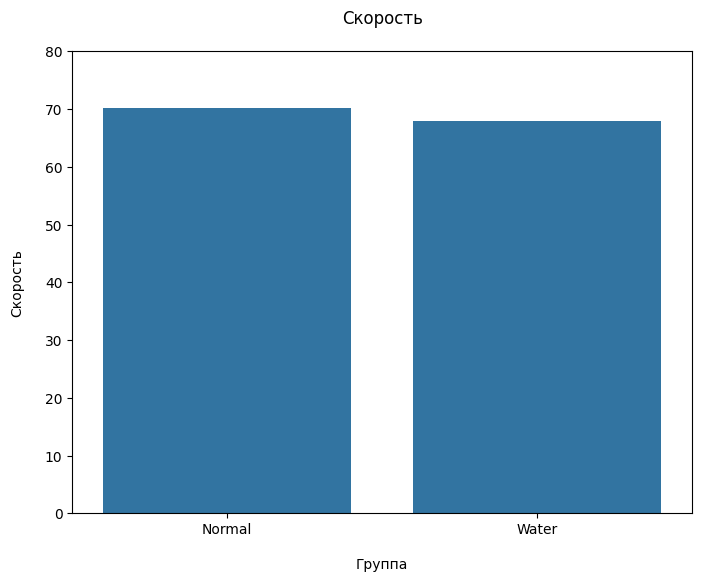

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test_['Class 1'], y=ab_test_['Speed'], ci=False)

plt.ylim(0, 80)
plt.title('Скорость', pad=20)
plt.xlabel('Группа', labelpad=15)
plt.ylabel('Скорость', labelpad=15);

Судя по приведенной выше статистике и графику, похоже, что Профессор Оук опять ошибался, подозревая, покемоны в классе Water в среднем быстрее, чем покемоны в классе Normal. Скорее наоборот, покемоны в классе Normal быстрее, чем покемоны в классе Water (70,29 против 67,89). Проверим его гипотезу, используя Т-тест Стьюдента

In [ ]:
Water = ab_test_[ab_test_['Class 1'] == 'Water']['Speed']
Normal = ab_test_[ab_test_['Class 1'] == 'Normal']['Speed']

In [ ]:
stat, p = st.ttest_ind(Water, Normal)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в группах Water и Normal нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = -0.53583, p = 0.59310
Не отклоняем нулевую гипотезу, разницы в группах Water и Normal нет


Выводы: поскольку значение p=0.59310 и превышает наше значение α=0.05 , мы не можем отвергнуть нулевую гипотезу H0 , а это означает, что Профессор Оук вероятно не ошибался, подозревая, покемоны в классе Water в среднем быстрее, чем покемоны в классе Normal.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
pokemon_3 = pokemon[pokemon['Name'].isin(treathed_pokemon)]

pokemon_3

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
pokemon_4 = pd.DataFrame(pd.concat([pokemon_,pokemon_3]).drop_duplicates(keep=False))
pokemon_4

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
...,...,...,...,...,...,...,...,...,...,...,...
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False
792,793,Xerneas,Fairy,NaN,126,131,95,131,98,99,True
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False


Сравняем обе выборки . Рандомно удалим лишние покемоны, чтобы обе выборки были одинаковые

In [ ]:
Speed_normal = pokemon_4.sample(n=4, random_state=22)

Speed_normal


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
448,449,Shinx,Electric,NaN,45,65,34,40,34,45,False
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,False
125,126,Horsea,Water,NaN,30,40,70,70,25,60,False
83,84,Ponyta,Fire,NaN,50,85,55,65,65,90,False


Добавим новый столбец speed_test, в котором будут значения test для покемонов, которым была дана сыворотка и normal - остальным, которым сыворотка не давалась

In [ ]:
pokemon_3.insert(loc = len(pokemon_3.columns), column = 'speed_test', value = 'test')
pokemon_3

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,speed_test
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,test
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False,test
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True,test
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,test


In [ ]:
Speed_normal.insert(loc = len(Speed_normal.columns), column = 'speed_test', value = 'normal')
Speed_normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,speed_test
448,449,Shinx,Electric,NaN,45,65,34,40,34,45,False,normal
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,False,normal
125,126,Horsea,Water,NaN,30,40,70,70,25,60,False,normal
83,84,Ponyta,Fire,NaN,50,85,55,65,65,90,False,normal


In [ ]:
ab_test_3 = pd.concat([pokemon_3, Speed_normal], axis=0)
ab_test_3.reset_index(drop=True, inplace=True)

In [ ]:
ab_test_3

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,speed_test
0,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,test
1,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False,test
2,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True,test
3,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,test
4,449,Shinx,Electric,NaN,45,65,34,40,34,45,False,normal
5,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,False,normal
6,126,Horsea,Water,NaN,30,40,70,70,25,60,False,normal
7,84,Ponyta,Fire,NaN,50,85,55,65,65,90,False,normal


In [ ]:
ab_test_3['speed_test'].value_counts()

speed_test
test      4
normal    4
Name: count, dtype: int64

In [ ]:
pd.crosstab(ab_test_3['speed_test'], ab_test_3['Speed'])

Speed,23,45,60,90,135,145,150
speed_test,,,,,,,
normal,1,1,1,1,0,0,0
test,0,0,0,0,1,1,2


In [ ]:
conversion_rates = ab_test_3.groupby('speed_test')['Speed']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Скорость', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

,Скорость,сред. кв. отклонение,ошибка среднего
speed_test,,,
normal,54.500,24.357,12.178
test,145.000,6.124,3.062


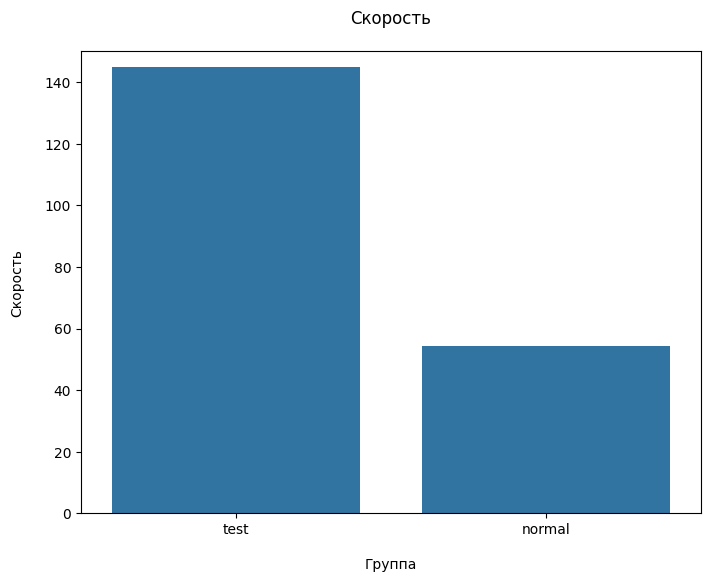

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test_3['speed_test'], y=ab_test_3['Speed'], ci=False)

plt.ylim(0, 150)
plt.title('Скорость', pad=20)
plt.xlabel('Группа', labelpad=15)
plt.ylabel('Скорость', labelpad=15);

Судя по приведенной выше статистике и графику, похоже, что сыворотка Профессора Оука работает, покемоны в тестовой группе в среднем значительно быстрее, чем покемоны из остальной выборки (145,0 против 54,5). Проверим гипотезу, используя Т-тест Стьюдента

In [ ]:
test = ab_test_3[ab_test_3['speed_test'] == 'test']['Speed']
normal = ab_test_3[ab_test_3['speed_test'] == 'normal']['Speed']

In [ ]:
stat, p = st.ttest_ind(test, normal)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в группах test и normal нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 6.24138, p = 0.00078
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы: поскольку наше значение p=0.00078 не превышает наше значение α=0.05 , мы можем отвергнуть нулевую гипотезу H0 , а это означает, что сыворотка Профессора Оук работает, скорость в тестовой группе статистически больше, чем у остальных покемонов, что подтверждает и построенный график

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

Найдем сумму и произведение характеристик HP, Attack, Defense

In [ ]:
pokemon.insert(loc = len(pokemon.columns), column = 'Sum', value = (pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']))
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300


In [ ]:
pokemon.insert(loc = len(pokemon.columns), column = 'multiplication', value = (pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']))
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [ ]:
pokemon['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

Сравняем оба класса. Рандомно удалим из класса False лишние покемоны, чтобы обе выборки были одинаковые

In [ ]:
false = pokemon[pokemon['Legendary'] == False].sample(n=65, random_state=22)
true = pokemon[pokemon['Legendary'] == True]


ab_test_4 = pd.concat([true, false], axis=0)
ab_test_4.reset_index(drop=True, inplace=True)

In [ ]:
false

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
672,673,Fraxure,Dragon,NaN,66,117,70,40,50,67,False,253,540540
178,179,Noctowl,Normal,Flying,100,50,50,76,96,70,False,200,250000
669,670,Lampent,Ghost,Fire,60,40,60,95,60,55,False,160,144000
325,326,Delcatty,Normal,NaN,70,65,65,55,55,70,False,200,295750
272,273,Treecko,Grass,NaN,40,45,35,65,55,70,False,120,63000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False,355,1638000
102,103,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,False,205,312000
345,346,Gulpin,Poison,NaN,70,43,53,43,53,40,False,166,159530
759,760,Barbaracle,Rock,Water,72,105,115,54,86,68,False,292,869400


In [ ]:
true

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [ ]:
ab_test_4

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
0,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
1,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
2,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
3,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
4,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False,355,1638000
126,103,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,False,205,312000
127,346,Gulpin,Poison,NaN,70,43,53,43,53,40,False,166,159530
128,760,Barbaracle,Rock,Water,72,105,115,54,86,68,False,292,869400


In [ ]:
ab_test_4['Legendary'].value_counts()

Legendary
True     65
False    65
Name: count, dtype: int64

Сначала проверим сумму характеристик HP, Attack, Defense

In [ ]:
pd.crosstab(ab_test_4['Legendary'], ab_test_4['Sum'])

Sum,102,110,120,135,139,140,144,145,146,147,...,360,370,375,380,385,390,395,396,410,440
Legendary,,,,,,,,,,,,,,,,,,,,,
False,1,1,2,2,1,2,1,2,2,1,...,1,0,1,0,0,0,0,0,1,0
True,0,0,0,0,0,0,0,0,0,0,...,1,3,0,2,1,1,1,1,0,1


In [ ]:
conversion_rates = ab_test_4.groupby('Legendary')['Sum']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Сила', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

,Сила,сред. кв. отклонение,ошибка среднего
Legendary,,,
False,212.985,70.432,8.736
True,309.077,46.071,5.714


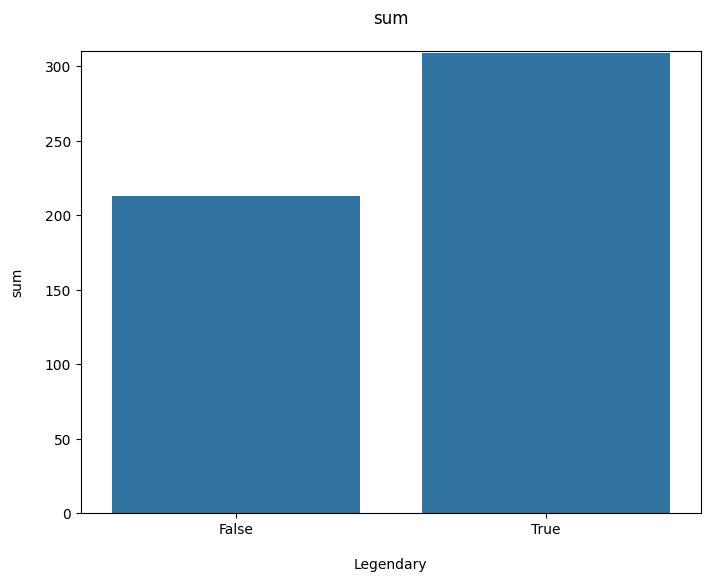

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test_4['Legendary'], y=ab_test_4['Sum'], ci=False)

plt.ylim(0, 310)
plt.title('sum', pad=20)
plt.xlabel('Legendary', labelpad=15)
plt.ylabel('sum', labelpad=15);

Судя по приведенной выше статистике и графику, похоже, что сумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов (309,1 против 213). Проверим гипотезу, используя Т-тест Стьюдента

In [ ]:
true = ab_test_4[ab_test_4['Legendary'] == True]['Sum']
false = ab_test_4[ab_test_4['Legendary'] == False]['Sum']

In [ ]:
stat, p = st.ttest_ind(true, false)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в группах true и false нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 9.13404, p = 0.00000
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Сумма характеристик HP, Attack, Defense у легендарных покемонов статистически отличается от остальной выборки, а график выше показал, что она выше

Теперь проверим произведение характеристик HP, Attack, Defense

In [ ]:
pd.crosstab(ab_test_4['Legendary'], ab_test_4['multiplication'])

multiplication,38400,40000,60000,63000,79625,90000,96250,96525,99450,108000,...,1728000,1740000,1800000,1890000,1936000,2014000,2100000,2125000,2400000,2880000
Legendary,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,2,1,1,2,...,0,1,0,0,0,0,0,0,1,0
True,0,0,0,0,0,0,0,0,0,0,...,1,0,3,1,1,1,1,1,0,1


In [ ]:
conversion_rates = ab_test_4.groupby('Legendary')['multiplication']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Сила', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

,Сила,сред. кв. отклонение,ошибка среднего
Legendary,,,
False,458702.862,481556.725,59729.761
True,1085941.615,512998.795,63629.669


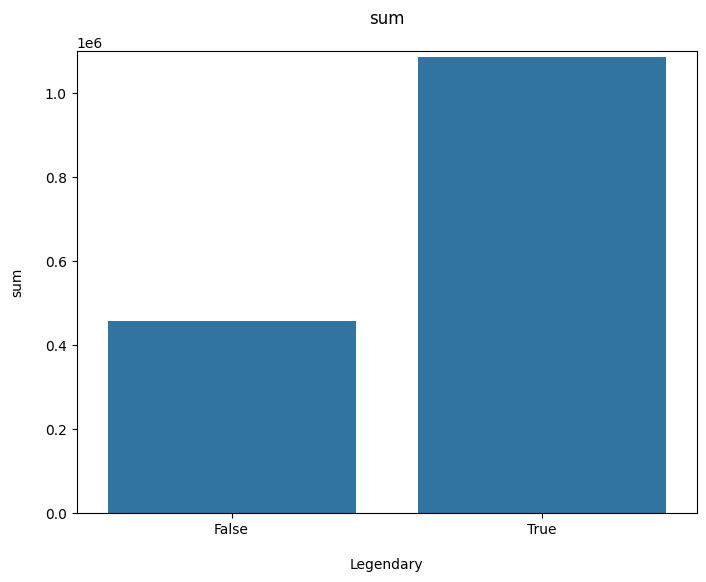

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test_4['Legendary'], y=ab_test_4['multiplication'], ci=False)

plt.ylim(0, 1100000)
plt.title('sum', pad=20)
plt.xlabel('Legendary', labelpad=15)
plt.ylabel('sum', labelpad=15);

Судя по приведенной выше статистике и графику, похоже, что произведение характеристик HP, Attack, Defense у легендарных покемонов более чем в два раза выше, чем у других покемонов. Проверим гипотезу, используя Т-тест Стьюдента

In [ ]:
true = ab_test_4[ab_test_4['Legendary'] == True]['multiplication']
false = ab_test_4[ab_test_4['Legendary'] == False]['multiplication']

In [ ]:
stat, p = st.ttest_ind(true, false)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в группах true и false нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 7.13168, p = 0.00000
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Произведение характеристик HP, Attack, Defense у легендарных покемонов статистически отличается от остальной выборки, а график выше показал, что оно выше

Вывод: АВ-тест показал, что характеристики HP, Attack, Defense у легендарных покемонов статистически отличаются от остальеных покемонов. Эти характеристики выше

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
pokemon_5 = pokemon[pokemon['Class 1'].isin(best_defence_class)]

pokemon_5

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210,318750
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90,13750
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False,165,140000
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,220,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Klefki,Steel,Fairy,57,80,91,80,87,75,False,228,414960
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False,209,322575
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False,396,2045160
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000


In [ ]:
pokemon_5['Class 1'].value_counts()

Class 1
Rock      44
Ground    32
Steel     27
Ice       24
Name: count, dtype: int64

Сравняем все классы. Рандомно удалим из классов Rock, Ground, Steel лишние покемоны, чтобы все выборки были одинаковые

In [ ]:
rock = pokemon_5[pokemon_5['Class 1'] == 'Rock'].sample(n=24, random_state=22)
ground = pokemon_5[pokemon_5['Class 1'] == 'Ground'].sample(n=24, random_state=22)
steel = pokemon_5[pokemon_5['Class 1'] == 'Steel'].sample(n=24, random_state=22)
ice = pokemon_5[pokemon_5['Class 1'] == 'Ice']


ab_test_5 = pd.concat([rock, ground, steel, ice], axis=0)
ab_test_5.reset_index(drop=True, inplace=True)

In [ ]:
rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
455,456,Shieldon,Rock,Steel,30,42,118,42,88,30,False,190,148680
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False,264,675702
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,240,252000
414,415,Regirock,Rock,NaN,80,100,200,50,100,50,True,380,1600000
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False,265,600875
627,628,Archen,Rock,Flying,55,112,45,74,45,70,False,212,277200
453,454,Cranidos,Rock,NaN,67,125,40,30,30,58,False,232,335000
266,267,Pupitar,Rock,Ground,70,84,70,65,70,51,False,224,411600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000


In [ ]:
ground

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
683,684,Golett,Ground,Ghost,59,74,50,35,50,35,False,183,218300
684,685,Golurk,Ground,Ghost,89,124,80,55,80,55,False,293,882880
589,590,Excadrill,Ground,Steel,110,135,60,50,65,88,False,305,891000
251,252,Donphan,Ground,NaN,90,120,120,60,60,50,False,330,1296000
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False,165,140000
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,True,440,2880000
613,614,Krookodile,Ground,Dark,95,117,80,65,70,92,False,292,889200
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000
376,377,Claydol,Ground,Psychic,60,70,105,70,120,75,False,235,441000
423,424,Groudon,Ground,NaN,100,150,140,100,90,90,True,390,2100000


In [ ]:
steel

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
749,750,Doublade,Steel,Ghost,59,110,150,45,49,35,False,319,973500
777,778,Klefki,Steel,Fairy,57,80,91,80,87,75,False,228,414960
750,751,Aegislash Blade Forme,Steel,Ghost,60,150,50,150,50,60,False,260,450000
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,False,430,2156250
662,663,Klinklang,Steel,NaN,60,100,115,70,85,90,False,275,690000
660,661,Klink,Steel,NaN,40,55,70,45,60,30,False,165,154000
328,329,Mawile,Steel,Fairy,50,85,85,55,55,50,False,220,361250
330,331,Aron,Steel,Rock,50,70,100,40,40,30,False,220,350000
540,541,Dialga,Steel,Dragon,100,120,120,150,100,90,True,340,1440000
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,167,117648


In [ ]:
ice

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
133,134,Jynx,Ice,Psychic,65,50,35,115,95,95,False,150,113750
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
238,239,Swinub,Ice,Ground,50,50,40,30,30,50,False,140,100000
239,240,Piloswine,Ice,Ground,100,100,80,60,60,50,False,280,800000
243,244,Delibird,Ice,Flying,45,55,45,65,45,75,False,145,111375
257,258,Smoochum,Ice,Psychic,45,30,15,85,65,65,False,90,20250
395,396,Snorunt,Ice,NaN,50,50,50,50,50,50,False,150,125000
396,397,Glalie,Ice,NaN,80,80,80,80,80,80,False,240,512000
397,398,Mega Glalie,Ice,NaN,80,120,80,120,80,100,False,280,768000
398,399,Spheal,Ice,Water,70,40,50,55,50,25,False,160,140000


In [ ]:
ab_test_5

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,multiplication
0,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
1,456,Shieldon,Rock,Steel,30,42,118,42,88,30,False,190,148680
2,379,Cradily,Rock,Grass,86,81,97,81,107,43,False,264,675702
3,104,Onix,Rock,Ground,35,45,160,30,45,70,False,240,252000
4,415,Regirock,Rock,NaN,80,100,200,50,100,50,True,380,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,675,Cubchoo,Ice,NaN,55,70,40,60,40,40,False,165,154000
92,676,Beartic,Ice,NaN,95,110,80,70,80,50,False,285,836000
93,677,Cryogonal,Ice,NaN,70,50,30,95,135,105,False,150,105000
94,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False,209,322575


In [ ]:
ab_test_5['Class 1'].value_counts()

Class 1
Rock      24
Ground    24
Steel     24
Ice       24
Name: count, dtype: int64

In [ ]:
pd.crosstab(ab_test_5['Class 1'], ab_test_5['Defense'])

Defense,15,25,30,35,40,45,50,55,60,65,...,130,135,140,145,150,160,180,184,200,230
Class 1,,,,,,,,,,,,,,,,,,,,,
Ground,0,1,0,1,0,1,2,1,2,0,...,1,0,1,0,0,1,0,0,0,0
Ice,1,0,1,1,2,1,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Rock,0,0,0,0,1,1,2,0,0,2,...,0,1,0,1,1,1,0,0,1,0
Steel,0,0,0,0,0,0,1,0,0,0,...,1,0,2,0,3,0,1,0,1,2


In [ ]:
conversion_rates = ab_test_5.groupby('Class 1')['Defense']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Defense', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates.style.format('{:.3f}')

,Defense,сред. кв. отклонение,ошибка среднего
Class 1,,,
Ground,87.083,34.526,7.048
Ice,71.417,33.664,6.872
Rock,100.208,38.612,7.882
Steel,125.333,46.370,9.465


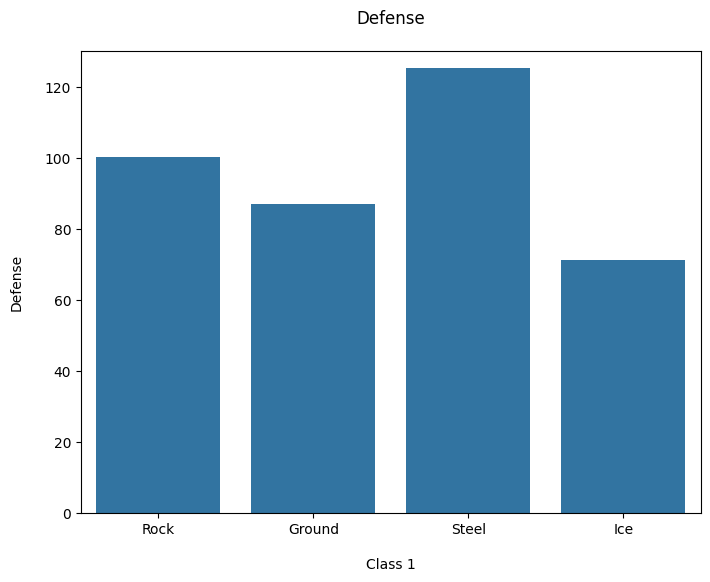

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test_5['Class 1'], y=ab_test_5['Defense'], ci=False)

plt.ylim(0, 130)
plt.title('Defense', pad=20)
plt.xlabel('Class 1', labelpad=15)
plt.ylabel('Defense', labelpad=15);

Судя по приведенной выше статистике и графику, похоже, что классы Rock, Ground, Steel и Ice все-таки отличаются. Проверим гипотезу, используя Для проверки гипотезы используем ANOVA

In [ ]:
rock = rock['Defense']
ground = ground['Defense']
steel = steel['Defense']
ice = ice['Defense']

In [ ]:
stat_, p_ = f_oneway(rock, ground, steel, ice)
print(f"Статистика = {stat_:.5f}, p = {p_:.5f}")

if p_ > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в классах нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 8.02845, p = 0.00008
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы: ANOVA показал, что классы по параметру defence отличаются.

Что бы далее определить, между какими конкретными группами существует статистически значимые различия, применим тест Тьюки

In [ ]:
# тест Тьюки
from scipy.stats import tukey_hsd

res = tukey_hsd(rock, ground, steel, ice)

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     13.125     0.658   -16.675    42.925
 (0 - 2)    -25.125     0.129   -54.925     4.675
 (0 - 3)     28.792     0.062    -1.009    58.592
 (1 - 0)    -13.125     0.658   -42.925    16.675
 (1 - 2)    -38.250     0.006   -68.050    -8.450
 (1 - 3)     15.667     0.518   -14.134    45.467
 (2 - 0)     25.125     0.129    -4.675    54.925
 (2 - 1)     38.250     0.006     8.450    68.050
 (2 - 3)     53.917     0.000    24.116    83.717
 (3 - 0)    -28.792     0.062   -58.592     1.009
 (3 - 1)    -15.667     0.518   -45.467    14.134
 (3 - 2)    -53.917     0.000   -83.717   -24.116



p-value > 0,05 между группами rock и ground, rock и steel, rock и ice, ground и ice. Это значит, что статистически значимой разницы между средними значениями данных групп нет, тогда как между группами ground и steel, steel и ice вероятно имеется статистически значимая разница

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.